<a href="https://colab.research.google.com/github/marawan1805/DataEngineering/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/Car_sale_ads.csv')

In [ ]:
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


**Data Cleaning**

In [ ]:
#when we used the df.isnull().sum() function we found that these following columns had too many missing values 
# and needed to be droped

df.drop('Vehicle_version' , axis = 1 , inplace = True)
df.drop('Vehicle_generation' , axis = 1 , inplace = True)
df.drop('CO2_emissions' , axis = 1  , inplace = True)
df.drop('Drive' , axis = 1 ,  inplace = True)
df.drop('Origin_country' , axis = 1 , inplace = True)
df.drop('First_owner' , axis = 1 , inplace = True)
df.drop('First_registration_date' , axis = 1 , inplace = True)

In [ ]:
# here the columns with missing values have to be delt with by using imputations that are done below 
df.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 983
Power_HP                   643
Displacement_cm3          1966
Fuel_type                    0
Transmission               479
Type                         0
Doors_number              1487
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

**Detecting and Removing Outliers**

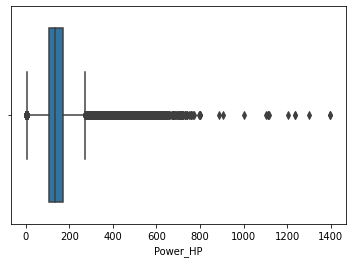

In [ ]:
#box-plot before removing outliers
sns.boxplot(x=df['Power_HP'])

In [ ]:
Q1 = df['Power_HP'].quantile(0.25)
Q3 = df['Power_HP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

67.0


In [ ]:
arr_1 = df['Power_HP'] < (Q1 - 1.5 * IQR)
arr_2 = df['Power_HP'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [ ]:
print("No. of outliers: ", mask.sum())


No. of outliers:  14090


In [ ]:
#Removing the outliers
df = df[~(mask)]
df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,Manual,small_cars,1.0,other,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,Manual,station_wagon,4.0,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,Manual,SUV,3.0,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,Manual,minivan,2.0,blue,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


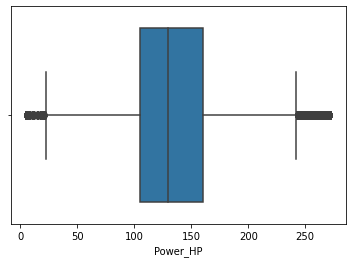

In [ ]:
#box-plot after removing outliers
sns.boxplot(x=df['Power_HP'])

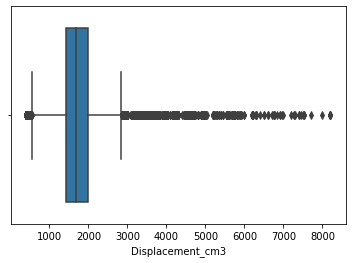

In [ ]:
#box-plot before removing outliers
sns.boxplot(x=df['Displacement_cm3'])

In [ ]:
Q1 = df['Displacement_cm3'].quantile(0.25)
Q3 = df['Displacement_cm3'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

573.0


In [ ]:
arr_1 = df['Displacement_cm3'] < (Q1 - 1.5 * IQR)
arr_2 = df['Displacement_cm3'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [ ]:
print("No. of outliers: ", mask.sum())


No. of outliers:  9205


In [ ]:
#Removing the outliers
df = df[~(mask)]
df

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,2021,1.0,145.0,1400.0,Gasoline,Manual,small_cars,3.0,gray,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,1974,59000.0,75.0,1100.0,Gasoline,Manual,coupe,2.0,silver,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,2018,52000.0,180.0,1368.0,Gasoline,Automatic,small_cars,3.0,silver,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,2012,29000.0,160.0,1368.0,Gasoline,Manual,small_cars,3.0,gray,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,2021,600.0,165.0,1368.0,Gasoline,Manual,small_cars,3.0,blue,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,2014,40000.0,173.0,1301.0,Gasoline,Manual,small_cars,1.0,other,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,1970,63518.0,70.0,2120.0,Gasoline,Manual,station_wagon,4.0,other,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,1977,11880.0,60.0,2120.0,Gasoline,Manual,SUV,3.0,red,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,1986,100000.0,36.0,2200.0,Gasoline,Manual,minivan,2.0,blue,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


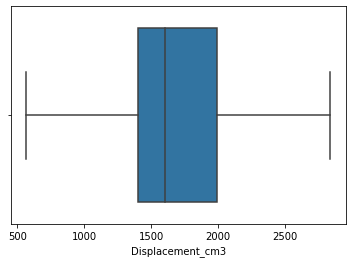

In [ ]:
#box-plot after removing outliers
sns.boxplot(x=df['Displacement_cm3'])

In [ ]:

# here we filled in the missing values using the mode as this is a categorcal variable

df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])

<ipython-input-19-b7f5b8cfe896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode()[0])


In [ ]:
df.isnull().sum()


Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 793
Power_HP                   609
Displacement_cm3          1652
Fuel_type                    0
Transmission                 0
Type                         0
Doors_number              1286
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

In [ ]:
#fill the missing values for numerical terms - mean(Continous Variables) - after removing outliers
df['Power_HP'] = df['Power_HP'].fillna(df['Power_HP'].mean())
df['Displacement_cm3'] = df['Displacement_cm3'].fillna(df['Displacement_cm3'].mean())
df['Doors_number'] = df['Doors_number'].fillna(df['Doors_number'].mean())

<ipython-input-21-f1336ab56669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power_HP'] = df['Power_HP'].fillna(df['Power_HP'].mean())
<ipython-input-21-f1336ab56669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Displacement_cm3'] = df['Displacement_cm3'].fillna(df['Displacement_cm3'].mean())
<ipython-input-21-f1336ab56669>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
# Here we selected the not null rows and put them in the dataframe

df = df[df['Mileage_km'].notna()]

In [ ]:
df.isnull().sum()

Index                     0
Price                     0
Currency                  0
Condition                 0
Vehicle_brand             0
Vehicle_model             0
Production_year           0
Mileage_km                0
Power_HP                  0
Displacement_cm3          0
Fuel_type                 0
Transmission              0
Type                      0
Doors_number              0
Colour                    0
Offer_publication_date    0
Offer_location            0
Features                  0
dtype: int64

In [ ]:
#Dropping unneeded columns
df.drop('Offer_publication_date' , axis = 1 , inplace = True)
df.drop('Offer_location' , axis = 1 , inplace = True)
df.isnull().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index               0
Price               0
Currency            0
Condition           0
Vehicle_brand       0
Vehicle_model       0
Production_year     0
Mileage_km          0
Power_HP            0
Displacement_cm3    0
Fuel_type           0
Transmission        0
Type                0
Doors_number        0
Colour              0
Features            0
dtype: int64

**Data Visulization**

In [ ]:
#pip install plotly
import plotly.graph_objects as go

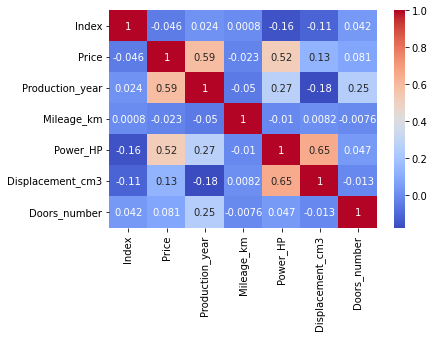

In [48]:
# in this plot iam exoring the correlation between the diffrent variables and how they are affected bt each other
corr = df.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')

In [ ]:
#creating a smaller dataframe and grouping by year
df1 = df[['Production_year', 'Price']]
df1 = df1.groupby(['Production_year']).mean().round(0).reset_index()

In [ ]:
#filtering the dataframe to eliminate outliers of price and production year
df1 = df1[df1['Price'] <= 1000000]
df1 = df1[df1['Production_year'] > 1930]

In [ ]:
#visualizing the average of car prices through different years, graph shows a decay in the prices of cars over the years since 1948 which was the peak of cars' prices.
import plotly.express as px
fig = px.line(df1, x="Production_year", y="Price", title='Car Prices through the years')
fig.show()

In [ ]:
df2 = df[['Production_year','Transmission']]
df2 = df2[df2['Production_year'] % 10 == 0]
count=df2["Production_year"].value_counts()

In [ ]:
fig = px.bar(df2, x="Production_year", color="Transmission", title="Long-Form Input")
fig.show()

In [ ]:
#creating a smaller dataframe and grouping by colour
df3 = df[['Colour', 'Price']]
df3 = df3.groupby(['Colour']).mean().round(0).reset_index()

In [ ]:
#here we're detecting if a color can cause an impact on the price of a car by comparing different colors to their average prices, results showed that most of the car colors are almost in the same range of prices except for colors like Brown, Gray, Red and white which are a bit more expensive.
fig = px.bar(df3, x=df3['Colour'], y=df3['Price'])
fig.show()

In [ ]:
#creating a smaller dataframe and grouping by Type
df4 = df[['Type','Displacement_cm3']]
df4 = df4.groupby(['Type']).mean().round(0).reset_index()

In [ ]:
numberTypes=df['Type'].value_counts()
numberTypes

station_wagon    37802
SUV              33249
compact          31433
sedan            25977
city_cars        24010
minivan          21281
small_cars        5684
coupe             3147
convertible       1633
Name: Type, dtype: int64

In [ ]:
#here we were trying to investigate if car displacememnt changes with the car type, and results have shown that it actually does as cars of type SUV has the greatest displacement in comparison to other car types, also station_wagon has the smallest displacement compared to other types of cars. 
fig = go.Figure(data=[go.Scatter(
    x=df4['Type'], 
    y=df4['Displacement_cm3'],
    mode='markers',  
    marker=
    dict( color=[120, 125, 130, 135, 140, 145] , size=numberTypes/230, showscale=True)  
          )])
fig.show()

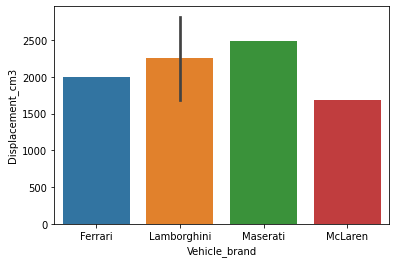

In [ ]:
# Here iam trying to explore which one of these supercars has the largest displacement(engine-size) and the results show that ' Maserati ' cars have the biggest displacement (engine-size) of all super cars

Supercarsdf = df[(df['Vehicle_brand'] == 'Ferrari') | (df['Vehicle_brand'] == 'Lamborghini') | (df['Vehicle_brand'] == 'Maserati') | (df['Vehicle_brand'] == 'McLaren')]
sns.barplot(x = 'Vehicle_brand' , y  = 'Displacement_cm3' , data = Supercarsdf )

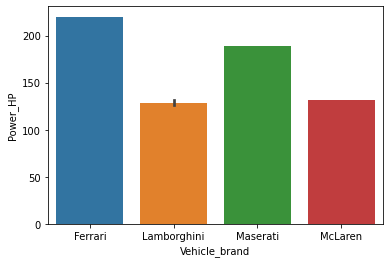

In [ ]:
# Here iam trying to explore which one of these supercars has the largest Horsepower , and the results show that the ' Ferrari ' has the highest horse-power of all supercars

Supercarsdf2 = df[(df['Vehicle_brand'] == 'Ferrari') | (df['Vehicle_brand'] == 'Lamborghini') | (df['Vehicle_brand'] == 'Maserati') | (df['Vehicle_brand'] == 'McLaren')]
sns.barplot(x = 'Vehicle_brand' , y = 'Power_HP' , data = Supercarsdf2 )